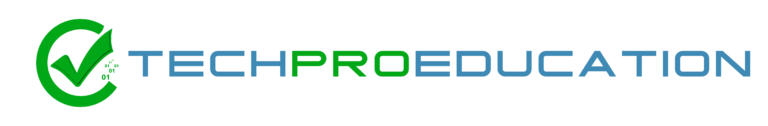

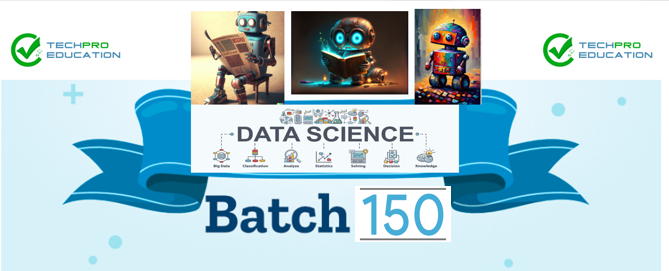

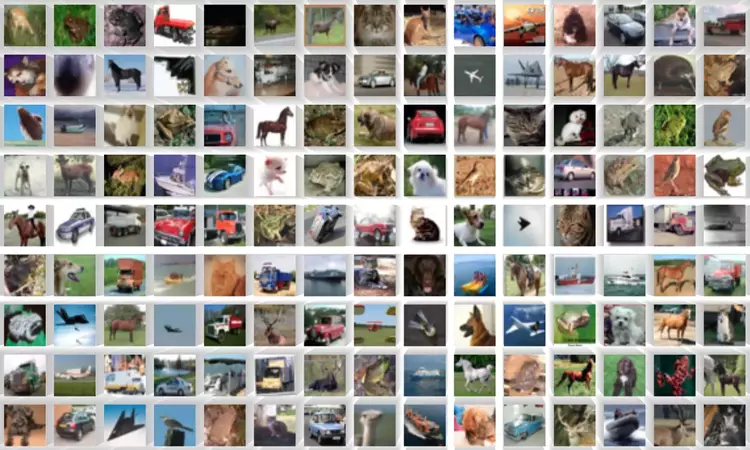

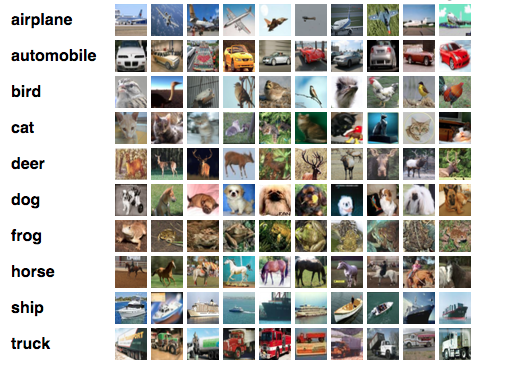

In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  50000 images in the training dataset
There are  10000 images in the test dataset


The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [5]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

In [6]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

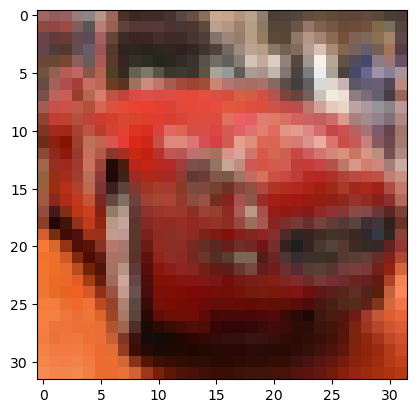

In [7]:
plt.imshow(X_train[5])

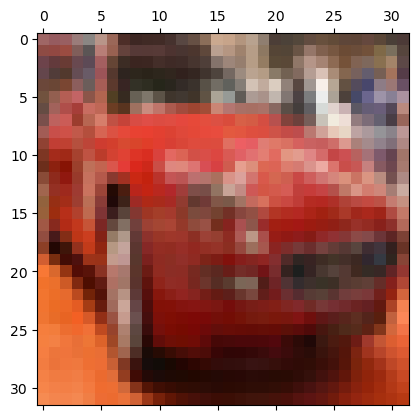

In [8]:
plt.matshow(X_train[5])

In [9]:
y_train[5]

array([1], dtype=uint8)

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train  # bunların hepsi birer skala değer, bu şekilde modele verirsek model bunun regresyon problem olduğunu düşünür. 

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
np.unique(y_train, return_counts=True)   # Array içindeki unique değerleri gösteriyor. 
#return_counts= True ile bu değerlerin sayılarını da görmüş oluyoruz.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
y_train[3]

array([4], dtype=uint8)

In [15]:
classes[int(y_train[3])]   # bunu indeksleyebiliyoruz. 

'deer'

In [16]:
int(np.random.randint(low=0, high=50000, size=1))  # 0 ile 50.000 arasında rastgele bir sayı döndürecek.

46684

In [17]:
np.random.randint(low=0, high=50000, size=17) 

array([45500, 17861,  2600, 32310, 26152, 29142, 25751,  8118, 32733,
       41838, 46051, 33535, 28945, 21432, 40306,  8593, 11875])

In [18]:
np.random.randint(low=0, high=50000, size=17) 

array([22613,  1147, 45834, 27807, 42548, 29234, 34315, 40632, 24894,
       29924,  6345, 22575, 32698, 32387, 40490,  1889, 43764])

In [19]:
X_train[int(np.random.randint(low=0, high=50000, size=1))]   # X Train içindeki bir resmi rastgele seçmiş oluyor. 

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [253, 255, 254],
        [253, 255, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[113, 118, 129],
        [108, 111, 123],
        [103, 104, 116],
        ...,
        [235, 234, 229],
        [218, 221, 216],
        [189, 187, 181]],

       [[111, 115, 123],
        [110, 110, 120],
        [107, 107, 118],
        ...,
        [243, 220, 211],
        [253, 252, 250],
        [251, 249, 247]],

       [[153, 155, 152],
        [124, 124, 127],
        [115, 115, 122],
        ...,
        [243, 210, 199],
        [255, 254, 254],
        [255, 254, 255]]

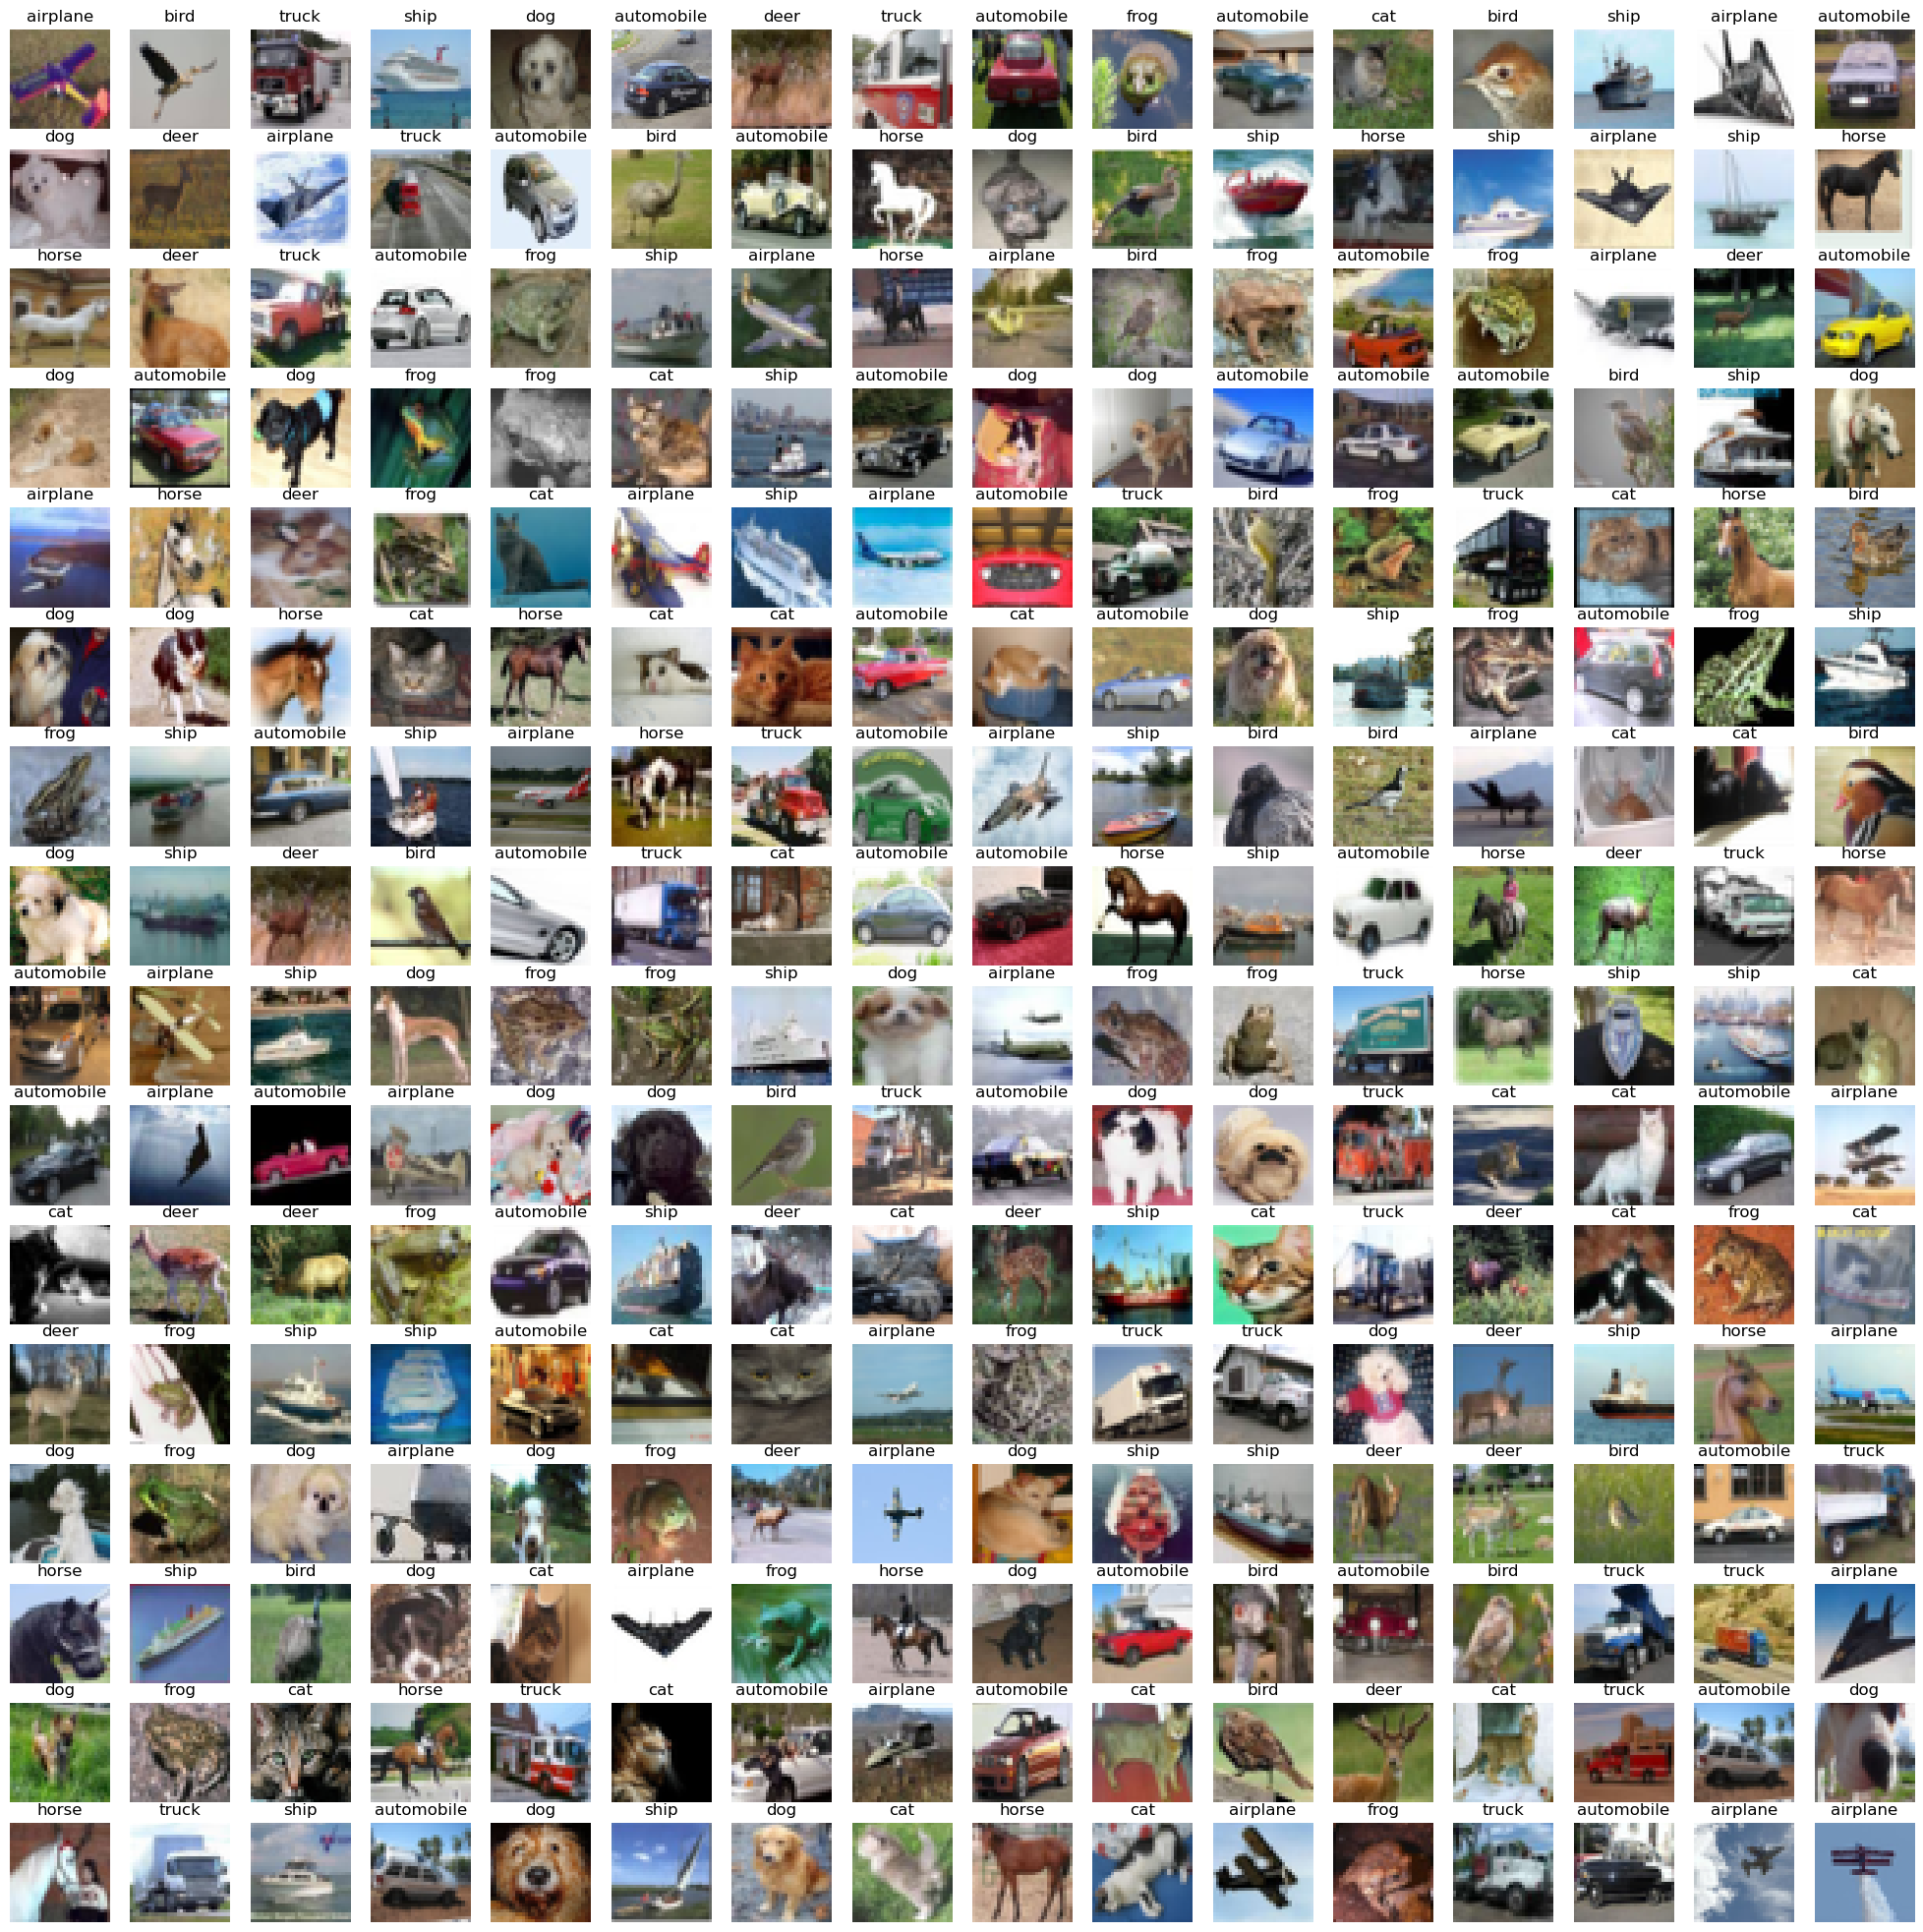

In [21]:
plt.figure(figsize=(25, 25))
for i in range(256):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(16, 16, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])    

## Data Preprocessing

In [22]:
X_train[5].min()

0

In [23]:
X_train[5].max()

252

In [24]:
# Normalize image pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [25]:
X_train[5].min()

0.0

In [26]:
X_train[5].max()

0.9882353

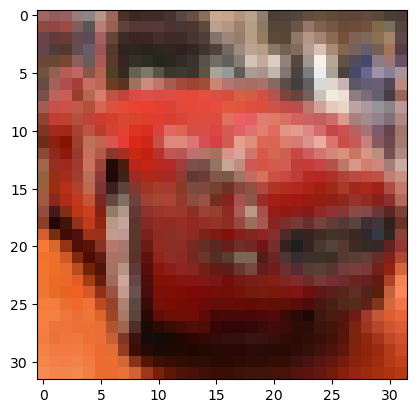

In [27]:
plt.imshow(X_train[5])

In [28]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [29]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

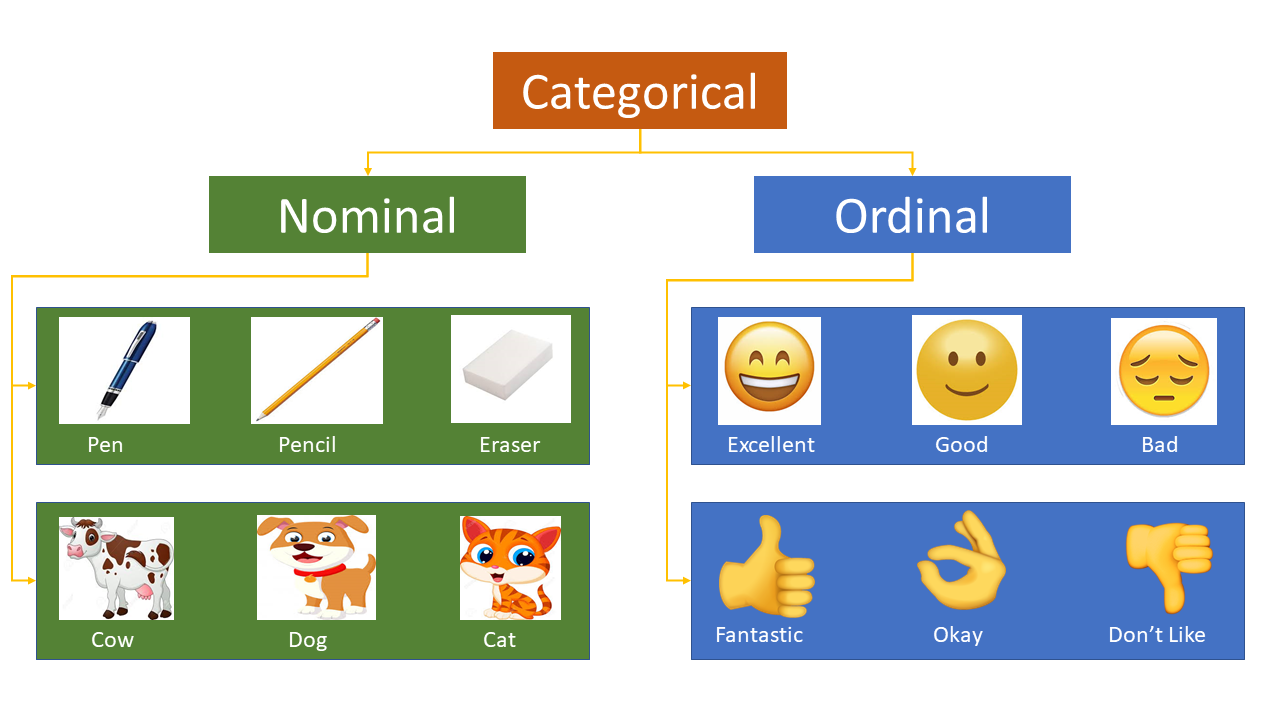

In [30]:
from tensorflow.keras.utils import to_categorical

In [31]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [32]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu', padding='same'))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0

* Flatten kısmında ki özellik sayısı önemli, ANN 4-6 bin civarı özelliği kaldırabilir ama eğer daha yüksek olursa ANN moseli kaldırmayabilir. Böyle bir durumda Conv2D + MaxPooling2D eklenerek özellik sayısı azaltılabilinilir

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)   # patience 10 ve üzeri önerilir

In [36]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 200s 127ms/step - loss: 1.4318 - accuracy: 0.4838 - val_loss: 1.0735 - val_accuracy: 0.6189
Epoch 2/50
1563/1563 [==============================] - 179s 115ms/step - loss: 0.9922 - accuracy: 0.6475 - val_loss: 0.9146 - val_accuracy: 0.6773
Epoch 3/50
1563/1563 [==============================] - 191s 122ms/step - loss: 0.8298 - accuracy: 0.7070 - val_loss: 0.8697 - val_accuracy: 0.7011
Epoch 4/50
1563/1563 [==============================] - 178s 114ms/step - loss: 0.7340 - accuracy: 0.7414 - val_loss: 0.8543 - val_accuracy: 0.7051
Epoch 5/50
1563/1563 [==============================] - 171s 109ms/step - loss: 0.6538 - accuracy: 0.7687 - val_loss: 0.8510 - val_accuracy: 0.7094
Epoch 6/50
1563/1563 [==============================] - 169s 108ms/step - loss: 0.5929 - accuracy: 0.7899 - val_loss: 0.8134 - val_accuracy: 0.7254
Epoch 7/50
1563/1563 [==============================] - 170s 109ms/step - loss: 0.5314 - accuracy: 0.8103 - val_

In [37]:
model.metrics_names

['loss', 'accuracy']

In [38]:
model.history.history

{'loss': [1.4318406581878662,
  0.9921952486038208,
  0.8298319578170776,
  0.733955442905426,
  0.6538333296775818,
  0.5928543210029602,
  0.5314193964004517,
  0.4772705137729645,
  0.43316853046417236,
  0.3905206620693207,
  0.34393391013145447],
 'accuracy': [0.4837599992752075,
  0.6474599838256836,
  0.7070000171661377,
  0.741379976272583,
  0.7686600089073181,
  0.7898600101470947,
  0.810259997844696,
  0.8307399749755859,
  0.8453999757766724,
  0.8599200248718262,
  0.8767799735069275],
 'val_loss': [1.073461651802063,
  0.9145937561988831,
  0.8697307705879211,
  0.8542592525482178,
  0.8510299921035767,
  0.8133600354194641,
  0.8538421988487244,
  0.933454692363739,
  0.9424559473991394,
  0.9621340036392212,
  1.0432229042053223],
 'val_accuracy': [0.6189000010490417,
  0.677299976348877,
  0.7010999917984009,
  0.7050999999046326,
  0.7093999981880188,
  0.7253999710083008,
  0.7192999720573425,
  0.7074000239372253,
  0.7233999967575073,
  0.7203999757766724,
  0.712

In [39]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.431841,0.48376,1.073462,0.6189
1,0.992195,0.64746,0.914594,0.6773
2,0.829832,0.70700,0.869731,0.7011
3,0.733955,0.74138,0.854259,0.7051
4,0.653833,0.76866,0.851030,0.7094


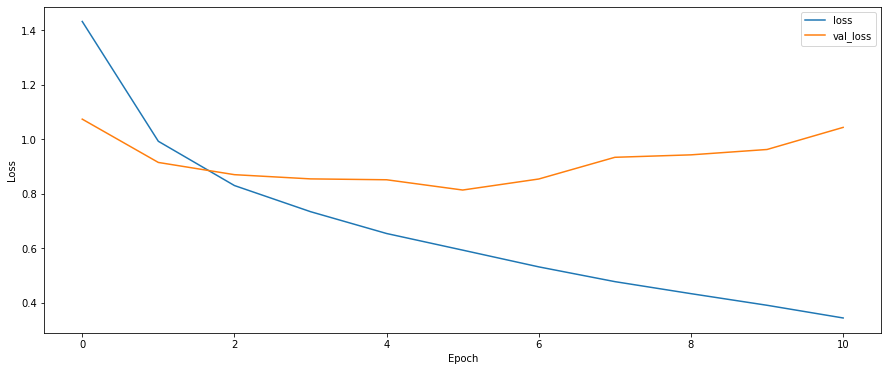

In [40]:
plt.figure(figsize=(15, 6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

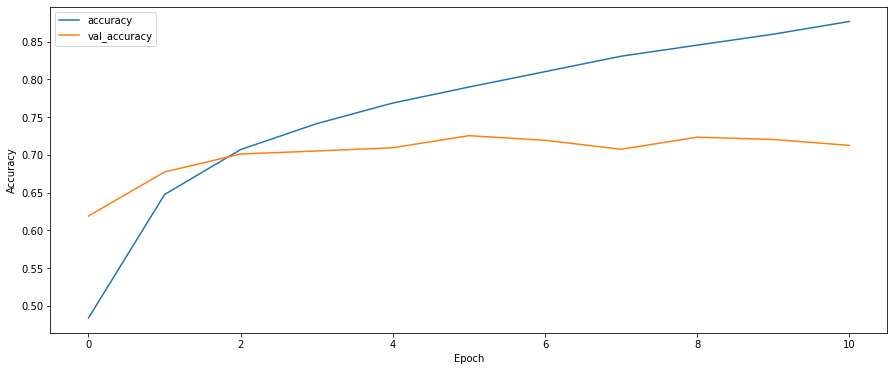

In [41]:
plt.figure(figsize=(15, 6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [42]:
print(model.evaluate(X_test, Y_test, verbose=1))

313/313 [==============================] - 13s 25ms/step - loss: 1.0432 - accuracy: 0.7125
[1.0432229042053223, 0.7124999761581421]


In [43]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [44]:
preds = model.predict(X_test)


In [45]:
predictions = np.argmax(preds, axis=1)

In [46]:
predictions

array([5, 8, 8, ..., 5, 4, 7], dtype=int64)

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1000
           1       0.89      0.79      0.84      1000
           2       0.59      0.60      0.60      1000
           3       0.61      0.37      0.46      1000
           4       0.61      0.72      0.66      1000
           5       0.60      0.65      0.62      1000
           6       0.76      0.80      0.78      1000
           7       0.77      0.78      0.77      1000
           8       0.77      0.86      0.82      1000
           9       0.79      0.83      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [48]:
print(confusion_matrix(y_test, predictions))

[[727  11  38  11  26   5  14  16 103  49]
 [ 21 794   8   7   6  11   8   6  39 100]
 [ 82   4 604  30 102  60  55  29  22  12]
 [ 34  12  96 367 120 208  94  39  20  10]
 [ 21   2  89  23 718  41  32  56  14   4]
 [ 13   4  73  99  59 646  35  55   8   8]
 [ 12   7  58  26  63  25 797   4   4   4]
 [ 17   0  36  21  67  61   8 778   6   6]
 [ 40  17  14   7  17   4   6   4 862  29]
 [ 25  44   8   7   8  11   6  22  37 832]]


In [49]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0432229042053223
Test accuracy: 0.7124999761581421


In [50]:
my_image = X_test[44]

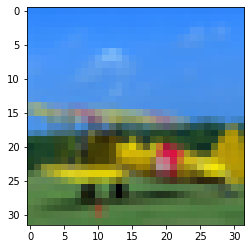

In [51]:
plt.imshow(my_image)

In [52]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

In [53]:
image_prediction

array([[9.9038202e-01, 3.3881104e-05, 4.4212057e-04, 5.6429235e-07,
        4.0423035e-04, 8.9203115e-07, 1.6301220e-08, 5.7746212e-07,
        1.8648272e-03, 6.8708803e-03]], dtype=float32)

In [54]:
np.argmax(image_prediction, axis=1)

array([0], dtype=int64)

In [55]:
result=np.argmax(image_prediction, axis=1)

In [56]:
result

array([0], dtype=int64)

In [57]:
classes[int(result)]

'airplane'

In [58]:
#model.save("cnn-1.h5")

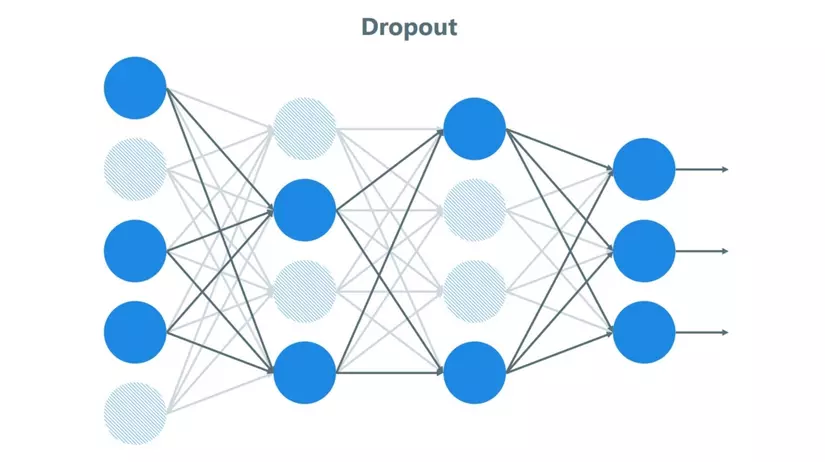

In [59]:
early_stop = EarlyStopping(monitor='val_loss', patience=15)

In [60]:
model= Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
        
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))  # padding='same' yazmadık o yüzden piksel 2 azalır 
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [ ]:
# bu model eğitimleri colab da GPU seçilerek yapılırsa daha sağlıklı olur local de çalışmak çok zaman alabilir 

In [62]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/100
1563/1563 [==============================] - 222s 138ms/step - loss: 1.4022 - accuracy: 0.4946 - val_loss: 1.0531 - val_accuracy: 0.6296
Epoch 2/100
1563/1563 [==============================] - 215s 137ms/step - loss: 0.9801 - accuracy: 0.6527 - val_loss: 0.8871 - val_accuracy: 0.6894
Epoch 3/100
1563/1563 [==============================] - 217s 139ms/step - loss: 0.8282 - accuracy: 0.7074 - val_loss: 0.7713 - val_accuracy: 0.7327
Epoch 4/100
1563/1563 [==============================] - 226s 145ms/step - loss: 0.7349 - accuracy: 0.7413 - val_loss: 0.7259 - val_accuracy: 0.7510
Epoch 5/100
1563/1563 [==============================] - 210s 134ms/step - loss: 0.6599 - accuracy: 0.7667 - val_loss: 0.7319 - val_accuracy: 0.7416
Epoch 6/100
1563/1563 [==============================] - 213s 137ms/step - loss: 0.6029 - accuracy: 0.7874 - val_loss: 0.7134 - val_accuracy: 0.7527
Epoch 7/100
1563/1563 [==============================] - 211s 135ms/step - loss: 0.5599 - accuracy: 0.8024

In [63]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.863136351108551
Test accuracy: 0.7698000073432922


In [64]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [65]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1000
           1       0.90      0.87      0.89      1000
           2       0.69      0.65      0.67      1000
           3       0.59      0.55      0.57      1000
           4       0.67      0.81      0.74      1000
           5       0.67      0.68      0.68      1000
           6       0.78      0.85      0.81      1000
           7       0.84      0.80      0.82      1000
           8       0.88      0.86      0.87      1000
           9       0.87      0.83      0.85      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



In [66]:
print(confusion_matrix(y_test, predictions))

[[780   7  64  23  25   9  13  14  48  17]
 [ 11 870   7  11   3   3  10   4  20  61]
 [ 41   1 653  41 116  58  60  19   9   2]
 [ 19   5  61 552  88 152  79  24   8  12]
 [ 10   2  46  31 815  35  24  33   3   1]
 [  8   1  24 169  47 680  29  37   2   3]
 [  3   2  30  50  44  14 850   5   1   1]
 [  9   1  34  31  64  45   6 803   2   5]
 [ 34  17  17  13  10   6  12   4 862  25]
 [ 33  57   9  12   4  11   7  11  23 833]]


<Axes: >

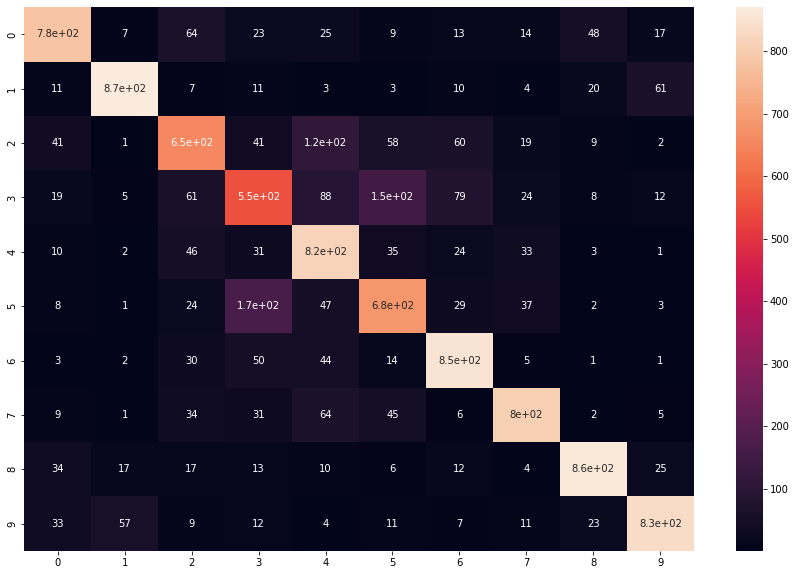

In [67]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

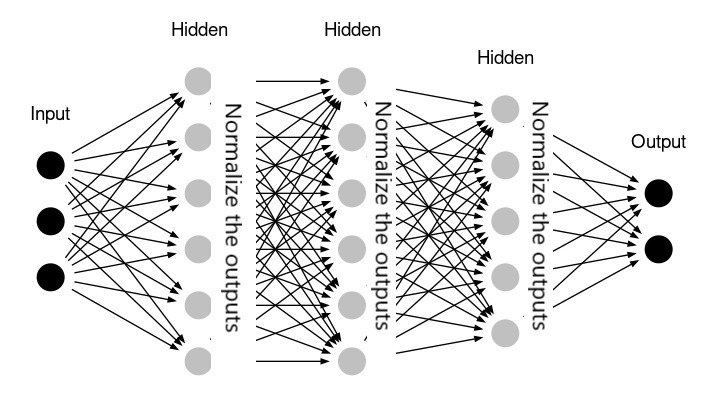

In [68]:
from tensorflow.keras.layers import BatchNormalization

In [69]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [70]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [71]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/100
1563/1563 [==============================] - 431s 271ms/step - loss: 1.5147 - accuracy: 0.4795 - val_loss: 1.1334 - val_accuracy: 0.6085
Epoch 2/100
1563/1563 [==============================] - 420s 269ms/step - loss: 0.9278 - accuracy: 0.6825 - val_loss: 0.8305 - val_accuracy: 0.7161
Epoch 3/100
1563/1563 [==============================] - 423s 271ms/step - loss: 0.7293 - accuracy: 0.7539 - val_loss: 0.8369 - val_accuracy: 0.7120
Epoch 4/100
1563/1563 [==============================] - 427s 273ms/step - loss: 0.6132 - accuracy: 0.7957 - val_loss: 0.6904 - val_accuracy: 0.7694
Epoch 5/100
1563/1563 [==============================] - 422s 270ms/step - loss: 0.5076 - accuracy: 0.8320 - val_loss: 0.6080 - val_accuracy: 0.8011
Epoch 6/100
1563/1563 [==============================] - 420s 269ms/step - loss: 0.4156 - accuracy: 0.8620 - val_loss: 0.5954 - val_accuracy: 0.8062
Epoch 7/100
1563/1563 [==============================] - 434s 278ms/step - loss: 0.3469 - accuracy: 0.8845

In [73]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7670202851295471
Test accuracy: 0.8240000009536743


In [74]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [75]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1000
           1       0.96      0.88      0.91      1000
           2       0.79      0.71      0.75      1000
           3       0.72      0.63      0.67      1000
           4       0.73      0.85      0.79      1000
           5       0.80      0.72      0.76      1000
           6       0.83      0.89      0.86      1000
           7       0.88      0.86      0.87      1000
           8       0.86      0.92      0.89      1000
           9       0.87      0.92      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



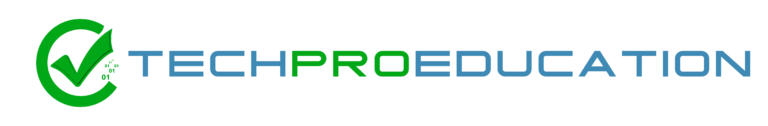

## Skor kotu gelirse: 
### 0) Hic bir seyi degistirmeden bir daha calistir
### 1) Padding --> valid yapilabilir
### 2) Model sade ise  Aktivasyon fonk degistirebilirsin, filtre sayisi degistirilebilir, batch size degistirilebilir, yapinin katmanlari artirilabilir. 
### 3) Drop Out, batch normalization eklenebilir.  
### 4) f1 Skoru dusuk gelen neseneden yeni data yukle
### 5) Transfer learning (prerained modeller) kullanilabilir. 
### 6) Computer Vision tarafina gec. Dusuk cikan resmini belli bir kismina odaklanarak calis. 

## YAPILAN HATALAR;
### 1) Son katmanda yanlis aktivasyon fonks secilmes
### 2) Patient degeri dusuk (3,4,5) ise tam ogrenemeden bitirir, EarlyStopping  artirilmali.
### 3) Son katman problemin yapisiyla uyumlu degilse (kategorikte ..) uygun metrik degerinin secilmesi, aktivasyon fonksiyonun uygun olmasi
### 4) CNN aktivasyon fonksRELU olsun, ANN kisminda farkli act fonk denenbilir. 
### 5) Flatten degeri ANN'in kaldirabilecegi adette olmali, yuksekse con+ max pool eklenebilir.
### 6) DropOut %20, %40, %50 gibi denenebilir. 
### 7) Max Poolingdeki boyut 2X2, Conv katmanda filterde 3X3 kullan her zaman.
### 8) Max poolun amaci; feature mapteki sayisal bilgiyi (pixel sayisini) ve devaminda flattendeki feature sayisini azaltmaktir. 
### 8) Flatten da ki yüksek feature azaltmak için ard arda maxpooling önerilen bir sey değil, önerilen Conv2D + maxpooling ile azaltmak. Örneğin yukarıda da bir model de Flatten da 6272 feature çıkmıştı ama bizim istediğimiz daha düşük feature sayısı ile ANN'e girmek

CNN (Convolutional Neural Network) tasarımında yaygın olarak kullanılan bir best practice, daha düşük seviyeli (**ilk katmanlarda**) **daha az filtre** ve daha yüksek seviyeli (**son katmanlarda**) **daha fazla filtre kullanmaktır**. Bu, özellikle resim sınıflandırma problemlerinde iyi sonuçlar veren bir yaklaşımdır ve aşağıdaki nedenlerle tercih edilir:

Hiyerarşik Özellikler: Daha düşük seviyeli katmanlar, daha basit ve temel özellikleri (örneğin kenarlar, köşeler) öğrenmeye eğilimlidir. Daha yüksek seviyeli katmanlar ise bu temel özellikleri birleştirerek daha karmaşık özellikleri (örneğin nesneler, yüzler) öğrenmeye eğilimlidir. Bu nedenle, daha düşük seviyeli katmanlarda daha az filtre kullanmak, temel özellikleri vurgulamak için yeterlidirken, daha yüksek seviyeli katmanlarda daha fazla filtre kullanmak, daha karmaşık özellikleri tanımlamak için faydalıdır.

Hesaplama Verimliliği: İlk katmanlar, girdi boyutunu daha fazla azaltmaya eğilimlidir. Bu nedenle, daha az filtre kullanarak hesaplama verimliliğini artırabilirsiniz. Daha yüksek seviyeli katmanlarda ise özellik haritası boyutları genellikle daha küçüktür, bu nedenle daha fazla filtre eklemek daha fazla özellik çıkarılmasına yardımcı olabilir.

Ancak, bu kural kesin değildir ve problem bağlamına ve veri setine bağlı olarak değişebilir. Her zaman bir hiperparametre ayarı olarak düşünülmelidir ve deneme-yanılma yoluyla en iyi sonuçları elde etmek için uyarlanabilir. Ayrıca, transfer öğrenme ve önceden eğitilmiş ağlar kullanarak bu tür mimarilerin ayarlaması daha kolay olabilir.

In [32]:
# colab da model eğitimleri çok hızlı gerçekleşti localde saatlerce sürücektir